In [33]:
import matplotlib.pyplot as plt
import numpy as np
import io
import PIL

plt.style.use('plotstyle.mplstyle')

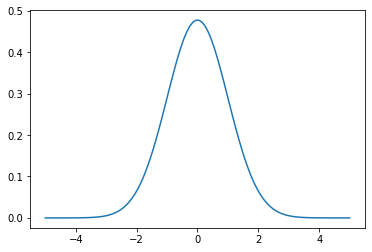

In [30]:
def gauss(x, sigma):
    a = 3/(sigma*(2*np.pi))
    e = (-0.5*((x*x)/(sigma*sigma)))
    return a*np.exp(e) 

def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = PIL.Image.open(buf)
    return img

x = np.linspace(-5,5,100)
y = gauss(x, 1)

fig, ax = plt.subplots()
ax.plot(x,y)

plt.show()


In [58]:
numFrames = 200
sigmaRange = (0.2,2)
sigmaStep = (sigmaRange[1]-sigmaRange[0])/numFrames

x = np.linspace(-10,10,1000)
#y = np.empty((numFrames, x.shape[0]))
imgs = []

for i in range(numFrames):
    y = gauss(x, sigmaRange[0] + sigmaStep*i)
    fig, ax = plt.subplots()
    c = [(numFrames-i*4)/numFrames, 0, i*4/numFrames]
    if c[0] < 0: c[0] = 0
    if c[2] > 1: c[2] = 1
    ax.plot(x,y, c=c)
    ax.set_ylim(0,3)
    ax.set_xlim(-5,5)
    ax.set_axis_off()
    imgs.append(fig2img(fig))
    plt.close()
    
imgs[0].save('outputs/gaussDiff.gif', format='GIF', append_images=imgs[1:], save_all=True, duration=20, loop=0)
    
    

    
    


    